In [92]:
import numpy as np
import matplotlib.pyplot as plt

In [104]:
A=[0,1,2,3] 
p=0.5
gamma=0.9
xsize=10
ysize=10
bs=[(5,5),(6,4)]
gs=(8,8)

In [105]:
def rew(x,y,gs,bs):
    gx,gy=gs
    if(x==gx and y==gy):
        return 100
    for i in range(len(bs)):
        x0,y0=bs[i]
        if(x0==x and y0==y):
            return -50
    return 0

In [106]:
def tr(x,y,a):
    if(a==0):
        return x-1,y
    elif(a==1):
        return x,y-1
    elif(a==2):
        return x,y+1
    else:
        return x+1,y

In [107]:
def tp(ins,a,fis,gs,bs):
    gx,gy=gs
    ix,iy=ins
    fx,fy=fis
    ab=xsize*ysize
    ux,uy=tr(ix,iy,a)
    if(ix==0 and iy==0):
        if(fx==ux and fy==uy):
            return p
        else:
            return 1-p
    if(ix==xsize-1 and iy==ysize-1):
        if(fx==ux and fy==uy):
            return p
        else:
            return 1-p
    if(ix==0 and iy==ysize-1):
        if(fx==ux and fy==uy):
            return p
        else:
            return 1-p
    if(iy==0 and ix==xsize-1):
        if(fx==ux and fy==uy):
            return p
        else:
            return 1-p
    if(ix==0):
        if(fx==ux and fy==uy):
            return p
        else:
            return (1-p)/2
    if(iy==0):
        if(fx==ux and fy==uy):
            return p
        else:
            return (1-p)/2
    if(ix==xsize-1):
        if(fx==ux and fy==uy):
            return p
        else:
            return (1-p)/2
    if(iy==ysize-1):
        if(fx==ux and fy==uy):
            return p
        else:
            return (1-p)/2
    else:
        if(fx==ux and fy==uy):
            return p
        else:
            return (1-p)/3

In [108]:
def Bellman_operator(V=np.zeros((xsize,ysize))):
    #V=np.zeros((xsize,ysize))
    gamma=0.9
    TV=np.ndarray((xsize,ysize))
    OP=np.zeros((xsize,ysize))
    for i in range(1,xsize-1):
        for j in range(1,ysize-1):
            maxv=-1000
            op=0
            t=0
            for a in range(4):
                if(i!=0):
                    z1=V[i-1][j]
                else:
                    z1=0
                if(j!=0):
                    z2=V[i][j-1]
                else:
                    z2=0
                if(j!=ysize):
                    z3=V[i][j+1]
                else:
                    z3=0
                if(i!=xsize):
                    z4=V[i+1][j]
                else:
                    z4=0
                t=rew(i,j,gs,bs)+gamma*(tp((i,j),a,(i-1,j),gs,bs)*z1+tp((i,j),a,(i,j-1),gs,bs)*z2+tp((i,j),a,(i,j+1),gs,bs)*z3+tp((i,j),a,(i+1,j),gs,bs)*z4)
                if(maxv<t):
                    maxv=t
                    op=a
            TV[i][j]=maxv
            OP[i][j]=op
    return TV,OP

In [109]:
Bellman_operator()

(array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0., -50.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0., -50.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 100.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]]),
 array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]

In [110]:
W=[]

In [111]:
def Value_iteration():
    tv=np.zeros((xsize,ysize))
    op=np.zeros((xsize,ysize))
    for k in range(200):
        tv,op=Bellman_operator(tv)
        W.append(tv)
    return tv,op

In [112]:
tv,op=Value_iteration()
print(tv)
print(op)

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  5.94749919e-01  1.01674556e+00  1.54069552e+00
   2.27916803e+00  3.30292577e+00  4.52089791e+00  5.29229932e+00
   3.90950829e+00  0.00000000e+00]
 [ 0.00000000e+00  9.14762767e-01  1.54761944e+00  2.32512995e+00
   3.45027741e+00  5.07314640e+00  7.18136476e+00  8.95052977e+00
   6.92369642e+00  0.00000000e+00]
 [ 0.00000000e+00  8.60810202e-01  1.41056476e+00  2.06171916e+00
   3.17811220e+00  5.52367853e+00  9.77706367e+00  1.34242793e+01
   1.10993127e+01  0.00000000e+00]
 [ 0.00000000e+00  5.92277624e-01  8.10177956e-01  4.74763101e-01
  -8.95617488e-01 -7.57926105e-01  1.22025433e+01  1.98894298e+01
   1.78824807e+01  0.00000000e+00]
 [ 0.00000000e+00  5.55908933e-01  1.02451361e-01 -2.93463061e+00
  -1.52219568e+01 -4.62885316e+01  1.26628616e+01  2.96956317e+01
   2.94092653e+01  0.00000000e+00

In [113]:
M=[]
tr=[]
for k in range(200):
    m=-1000
    tr.append(k)
    H=W[k]
    for i in range(xsize):
        for j in range(ysize):
            m=max(m,abs(H[i][j]-tv[i][j]))
    M.append(m)       

In [114]:
print(op)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 2. 3. 3. 3. 3. 3. 3. 3. 0.]
 [0. 2. 2. 2. 2. 2. 3. 3. 3. 0.]
 [0. 2. 2. 2. 2. 2. 2. 3. 3. 0.]
 [0. 0. 0. 0. 0. 2. 2. 3. 3. 0.]
 [0. 3. 0. 0. 0. 2. 2. 3. 3. 0.]
 [0. 3. 3. 3. 3. 2. 2. 3. 3. 0.]
 [0. 2. 3. 3. 2. 2. 2. 2. 3. 0.]
 [0. 2. 2. 2. 2. 2. 2. 2. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


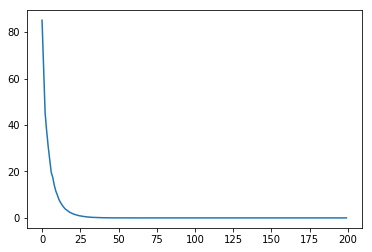

In [115]:
plt.plot(tr,M)